In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
 # Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
# Flatten images to vectors
x_train_flat = x_train.reshape((len(x_train), 28 * 28))
x_test_flat = x_test.reshape((len(x_test), 28 * 28))

In [ ]:
# Autoencoder architecture parameters
input_dim = 28 * 28
encoding_dim = 64

In [ ]:
# Encoder
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

In [ ]:
# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [ ]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [ ]:
# Encoder model for compressed output
encoder = Model(input_img, encoded)

In [ ]:
# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train autoencoder
autoencoder.fit(x_train_flat, x_train_flat,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test_flat, x_test_flat))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.4463 - val_loss: 0.3107
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.3041 - val_loss: 0.2979
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.2943 - val_loss: 0.2922
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.2890 - val_loss: 0.2891
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.2857 - val_loss: 0.2858
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.2837 - val_loss: 0.2837
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2811 - val_loss: 0.2819
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2793 - val_loss: 0.2806
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2776 - val_loss: 0.2795
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.2770 - val_loss: 0.2796
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2764 - val_loss: 0.2780
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Encode and decode test images

encoded_imgs = encoder.predict(x_test_flat)
decoded_imgs = autoencoder.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


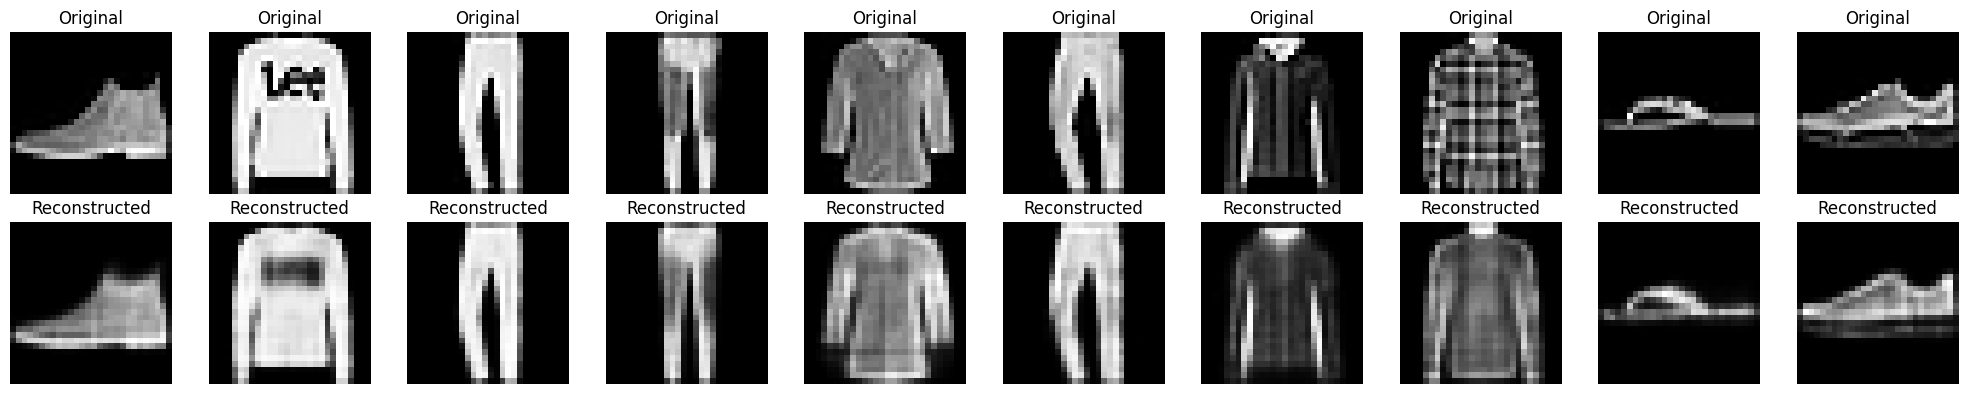

In [ ]:
# Display original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()
